In [3]:
from sudoku_nisq.sudoku import Sudoku

Generate and plot a random 4x4 puzzle with 4 missing cells:

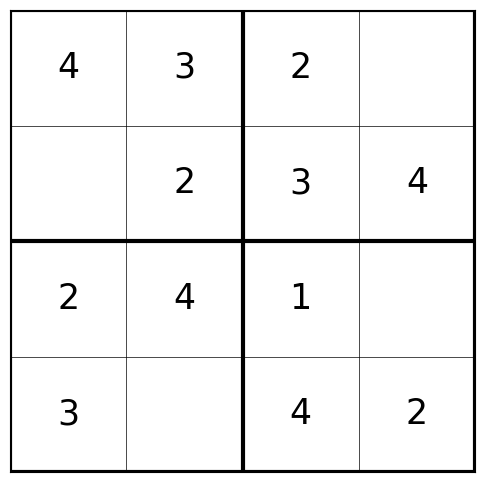

In [4]:
sudoku = Sudoku(grid_size=2,num_missing_cells=4)

sudoku.plot()

Initialize the quantum solver using a simple encoding for this puzzle:

In [5]:
sudoku._init_quantum(simple=True,pattern=False)

Estimate rough resources for solving this puzzle on a quantum device:

In [6]:
sudoku.quantum.find_resources()

# Number of qubits || Number of MCX gates || Total number of gates

(37, 375, 432)

In [104]:
sudoku.quantum.subsets

{'S_0': [(1, 0), ('row', 1, 1), ('col', 0, 1), ('subgrid', 0, 0, 1)],
 'S_1': [(1, 0), ('row', 1, 3), ('col', 0, 3), ('subgrid', 0, 0, 3)],
 'S_2': [(1, 1), ('row', 1, 1), ('col', 1, 1), ('subgrid', 0, 0, 1)],
 'S_3': [(1, 1), ('row', 1, 3), ('col', 1, 3), ('subgrid', 0, 0, 3)],
 'S_4': [(2, 0), ('row', 2, 1), ('col', 0, 1), ('subgrid', 2, 0, 1)],
 'S_5': [(3, 1), ('row', 3, 3), ('col', 1, 3), ('subgrid', 2, 0, 3)]}

In [105]:
sudoku.quantum.universe

[(1, 0),
 (1, 1),
 (2, 0),
 (3, 1),
 ('row', 2, 1),
 ('row', 3, 3),
 ('row', 1, 1),
 ('row', 1, 3),
 ('col', 0, 1),
 ('col', 1, 1),
 ('col', 0, 3),
 ('col', 1, 3),
 ('subgrid', 0, 0, 3),
 ('subgrid', 2, 0, 1),
 ('subgrid', 2, 0, 3),
 ('subgrid', 0, 0, 1)]

With pattern encoding we lower the resources, but up to an upper bound of the size of the problem:

In [7]:
sudoku._init_quantum(simple=False,pattern=True)

In [8]:
sudoku.quantum.find_resources()

# Number of qubits || Number of MCX gates || Total number of gates

(19, 63, 76)

In [9]:
sudoku.quantum.get_circuit()

[H S[0]; H S[1]; X anc; CnX S[0], U_14[0]; H anc; CnX S[0], U_11[0]; CnX S[0], U_4[0]; CnX S[0], U_1[0], U_10[0], U_11[0], U_12[0], U_13[0], U_14[0], U_15[0]; CnX S[0], U_1[0], U_10[0], U_11[0], U_12[0], U_13[0], U_14[0]; CnX S[0], U_1[0], U_10[0], U_11[0], U_12[0], U_13[0]; CnX S[0], U_1[0], U_10[0], U_11[0], U_12[0]; CnX S[0], U_1[0], U_10[0], U_11[0]; CnX S[1], U_12[0]; CnX S[0], U_1[0], U_10[0]; CnX S[1], U_8[0]; CnX S[0], U_1[0]; CnX S[1], U_5[0]; CnX S[0], U_13[0]; CnX S[1], U_2[0]; CnX S[0], U_9[0]; CnX S[0], U_6[0]; CnX S[0], U_3[0]; CnX S[0], U_15[0]; CnX S[0], U_10[0]; CnX S[0], U_7[0]; CnX S[0], U_0[0]; CnX U_0[0], U_1[0], U_2[0], U_3[0], U_4[0], U_5[0], U_6[0], U_7[0], U_8[0], U_9[0], U_10[0], U_11[0], U_12[0], U_13[0], U_14[0], U_15[0], anc; CnX S[0], U_0[0]; CnX S[1], U_2[0]; CnX S[0], U_7[0]; CnX S[1], U_5[0]; CnX S[0], U_10[0]; CnX S[1], U_8[0]; CnX S[0], U_15[0]; CnX S[1], U_12[0]; CnX S[0], U_3[0]; H S[1]; CnX S[0], U_6[0]; X S[1]; CnX S[0], U_9[0]; CnX S[0], U_13[0];

In [28]:
sudoku.quantum.draw_circuit()

In [ ]:
sudoku.quantum.subsets


{'S_0': [(1, 0),
  ('row', 1, 1),
  ('col', 0, 1),
  ('subgrid', 0, 0, 1),
  (3, 1),
  ('row', 3, 1),
  ('col', 1, 1),
  ('subgrid', 2, 0, 1),
  (0, 3),
  ('row', 0, 1),
  ('col', 3, 1),
  ('subgrid', 0, 2, 1)],
 'S_2': [(2, 3), ('row', 2, 3), ('col', 3, 3), ('subgrid', 2, 2, 3)]}

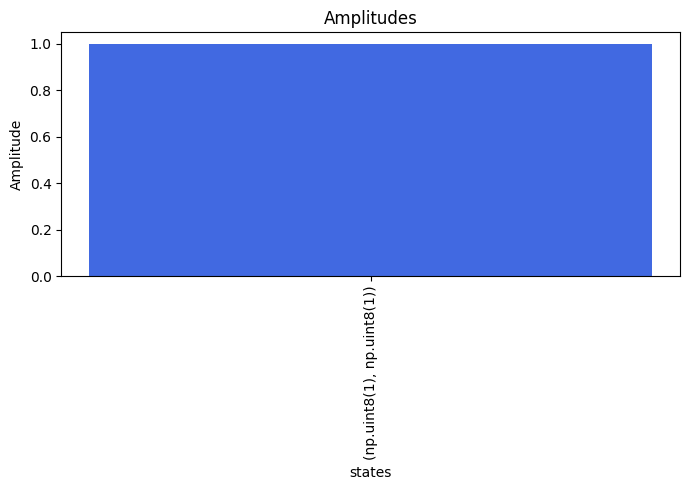

In [12]:
sudoku.quantum.aer_simulation(shots=2000)
sudoku.quantum.counts_plot()

In [13]:
ibm_token = "7a854fadb9bfc4d4d7202c44bb10598d64945d5b97deabecd8ddc9eaeb574b7e2ff86765f0c8079fb470a78d37aa2e872684355d720451a5fb41e82d1c1c2789"

from qiskit_ibm_runtime import QiskitRuntimeService
from pytket.extensions.qiskit import IBMQBackend

QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_token, overwrite=True)

In [14]:
backendinfo_list = IBMQBackend.available_devices()
print([backend.device_name for backend in backendinfo_list])

['ibm_brisbane', 'ibm_kyiv', 'ibm_sherbrooke']


In [15]:
backend = IBMQBackend("ibm_brisbane")

In [16]:
from pytket.passes import FlattenRegisters

flatten = FlattenRegisters()
flatten.apply(sudoku.quantum.main_circuit)

False

In [17]:
compiled_circuit_0 = backend.get_compiled_circuit(sudoku.quantum.main_circuit, optimisation_level=0)
compiled_circuit_1 = backend.get_compiled_circuit(sudoku.quantum.main_circuit, optimisation_level=1)
compiled_circuit_2 = backend.get_compiled_circuit(sudoku.quantum.main_circuit, optimisation_level=2)

In [18]:
print(compiled_circuit_0.n_qubits)
print(compiled_circuit_1.n_qubits)
print(compiled_circuit_2.n_qubits)

24
24
24


In [19]:
print(compiled_circuit_0.n_gates)
print(compiled_circuit_1.n_gates)
print(compiled_circuit_2.n_gates)

60051
38839
29343


In [22]:
print(compiled_circuit_0.depth())
print(compiled_circuit_1.depth())
print(compiled_circuit_2.depth())

27880
15835
12565


In [23]:
handle = backend.process_circuit(compiled_circuit_2,n_shots = 1024)

In [26]:
# assert backend.persistent_handles
# print(str(handle))
p_handle = ('cyyfpg2jj6dg008gqaag', 0, 2, 'null')
counts = backend.get_result(p_handle).get_counts()
print(counts)

Counter({(np.uint8(0), np.uint8(1)): 264, (np.uint8(0), np.uint8(0)): 256, (np.uint8(1), np.uint8(1)): 256, (np.uint8(1), np.uint8(0)): 248})


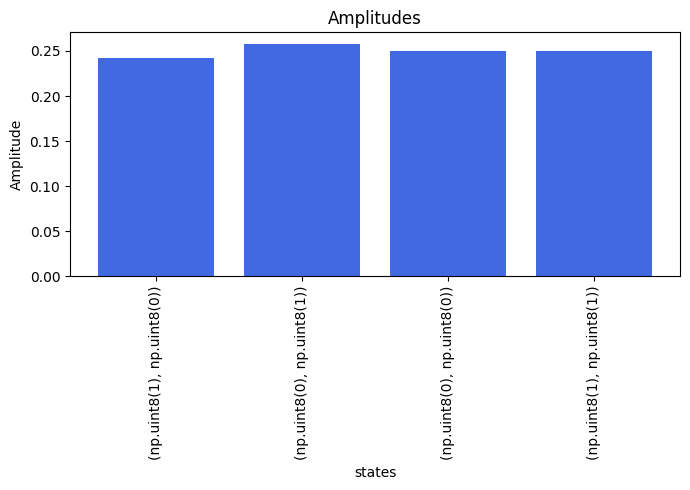

In [27]:
sudoku.quantum.counts_plot(counts)

In [1]:
sudoku.quantum.subsets

NameError: name 'sudoku' is not defined